# Selection of some use cases
## Imports and other necessary things

In [1]:
import networkx as nx
from pathlib import Path
from gooddata_sdk import CatalogWorkspace


from gooddata_sdk import GoodDataSdk, CatalogWorkspace
import os

from dotenv import load_dotenv

load_dotenv()

True

In [2]:
sdk = GoodDataSdk.create(os.environ["HOST"], os.environ["TOKEN"])

## Playing around with workspace hierarchy

In [3]:
workspaces = sdk.catalog_workspace.list_workspaces()
workspace_parent_pairs = [(workspace.parent_id, workspace.id) if workspace.parent_id else ("root", workspace.id) for
                          workspace in workspaces]
print(workspace_parent_pairs)

[('root', 'demo'), ('demo', 'demo_west'), ('demo_west', 'demo_west_california')]


In [4]:
directed_graph = nx.DiGraph()
directed_graph.add_edges_from(workspace_parent_pairs)
print(directed_graph)

DiGraph with 4 nodes and 3 edges


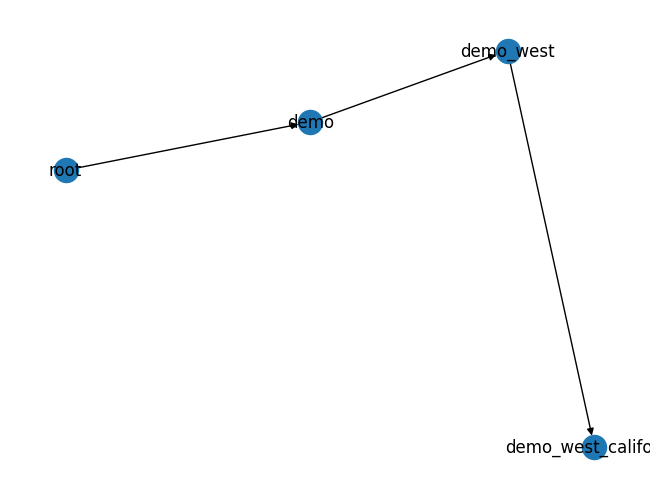

In [5]:
nx.draw(directed_graph, with_labels=True)

## Playing around with dependent entity graph

In [6]:
entities_graph = sdk.catalog_workspace_content.get_dependent_entities_graph(workspace_id="demo")

# We can see all types
set(node.type for node in entities_graph.graph.nodes)

filtered = {"visualizationObject", "fact"}

edges = [(edge[0].id, edge[1].id) for edge in
         entities_graph.graph.edges if len({edge[0].type, edge[1].type} - filtered) == 0 ]

In [7]:
directed_graph = nx.DiGraph()
directed_graph.add_edges_from(edges)
print(directed_graph)

DiGraph with 3 nodes and 2 edges


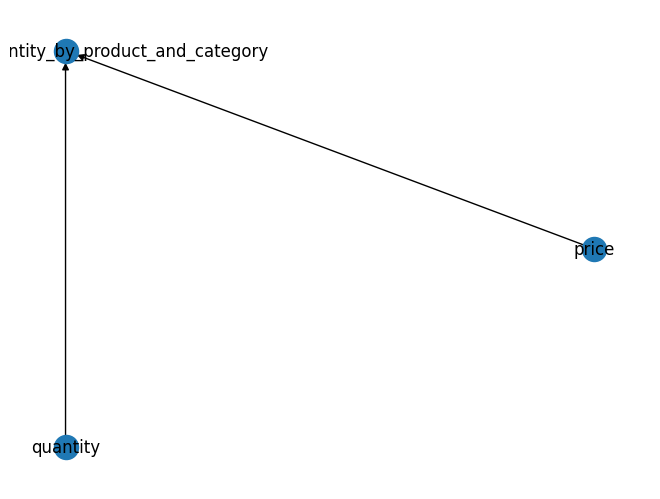

In [8]:
pos = nx.circular_layout(directed_graph)
nx.draw(directed_graph, pos=pos, with_labels=True)

## The power of layouts

### Store all my workspaces

In [9]:
layout_root_path = Path.cwd().parent / "my_gooddata_layout"

In [10]:
sdk.catalog_workspace.store_declarative_workspaces(layout_root_path=layout_root_path)

#### Let's play around...
and then put

In [11]:
sdk.catalog_workspace.load_and_put_declarative_workspaces(layout_root_path=layout_root_path)

### Make a copy

In [12]:
demo_copy = CatalogWorkspace(workspace_id="demo-copy", name="Demo copy")

declarative_ldm = sdk.catalog_workspace_content.get_declarative_ldm("demo")
declarative_analytics_model = sdk.catalog_workspace_content.get_declarative_analytics_model("demo")

sdk.catalog_workspace.create_or_update(workspace=demo_copy)

sdk.catalog_workspace_content.put_declarative_ldm(workspace_id=demo_copy.id, ldm=declarative_ldm)
sdk.catalog_workspace_content.put_declarative_analytics_model(workspace_id=demo_copy.id,
                                                              analytics_model=declarative_analytics_model)